In [26]:
pip install gradio

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import gradio as gr

#DataSet




In [28]:

pakwheels_data = pd.read_csv('/content/pakwheels.csv')
pakwheels_data.head()


,Unnamed: 0,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,0,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Imported Cars,1800 cc,Sedan,9-Oct-22,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,1,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,Imported Cars,800 cc,Hatchback,9-Oct-22,AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,2,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,Imported Cars,1500 cc,Sedan,9-Oct-22,AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...
3,3,https://www.pakwheels.com/used-cars/toyota-for...,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,PKR 70 lacs,"94,000 km",Petrol,Automatic,Lahore,Black,Imported Cars,2700 cc,SUV,9-Oct-22,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,Inside out fully original. Original return fil...
4,4,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,PKR 8 lacs,"86,000 km",Petrol,Manual,Multan,Grey,Imported Cars,796 cc,Hatchback,9-Oct-22,AM/FM Radio\nCD Player\nImmobilizer Key,gari total genion hy.chill a.c.new tires.no wo...


# Preprocessing the dataset


In [29]:
# Preprocessing the dataset

# Clean and convert the price column to numeric (remove "PKR" and "lacs")
pakwheels_data['price'] = pakwheels_data['price'].str.replace("PKR", "").str.replace("lacs", "").str.strip()
pakwheels_data['price'] = pd.to_numeric(pakwheels_data['price'], errors='coerce')

# Clean and convert mileage column to numeric (remove "km" and commas)
pakwheels_data['mileage'] = pakwheels_data['mileage'].str.replace("km", "").str.replace(",", "").str.strip()
pakwheels_data['mileage'] = pd.to_numeric(pakwheels_data['mileage'], errors='coerce')

# Convert engine_capacity to numeric (remove "cc")
pakwheels_data['engine_capacity'] = pakwheels_data['engine_capacity'].str.replace("cc", "").str.strip()
pakwheels_data['engine_capacity'] = pd.to_numeric(pakwheels_data['engine_capacity'], errors='coerce')


In [30]:
# Select relevant columns for regression
features = ['model_year', 'mileage', 'engine_type', 'transmission', 'assembly', 'engine_capacity', 'body_type']
target = 'price'

# Drop rows with missing target or features
pakwheels_data = pakwheels_data.dropna(subset=features + [target])

#HeatMap

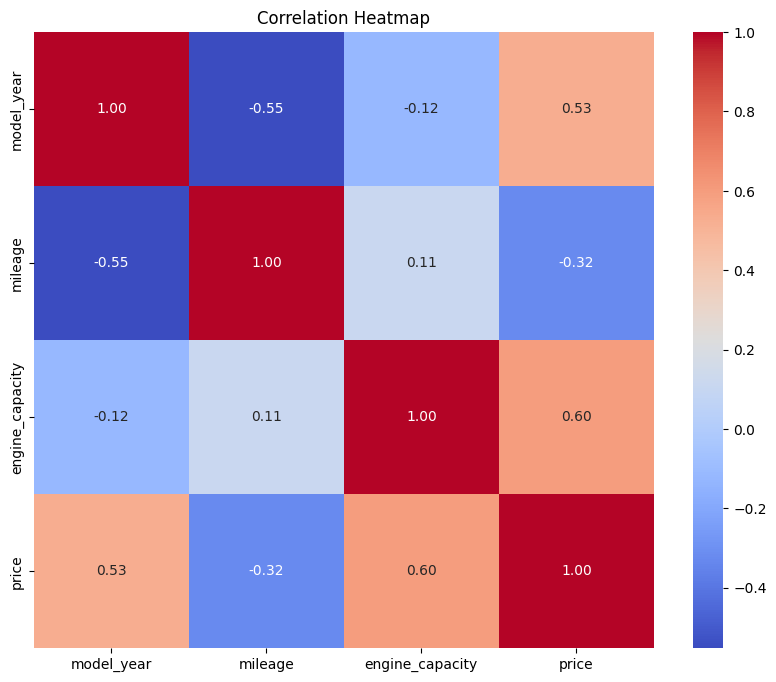

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# Heatmap: Correlation between all numerical features and target
correlation_matrix = pakwheels_data[features + [target]].corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Modeling

In [32]:

# Separate features and target
X = pakwheels_data[features]
y = pakwheels_data[target]

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['engine_type', 'transmission', 'assembly', 'body_type'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(49.129316064549265, 0.8605017964591)

#visualization

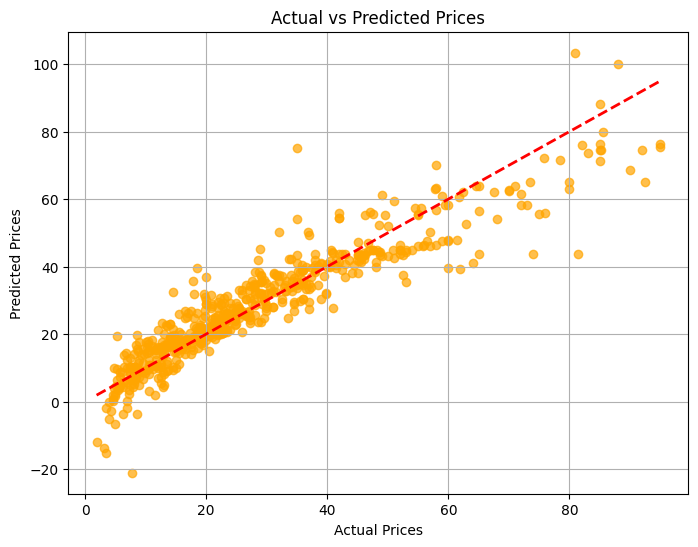

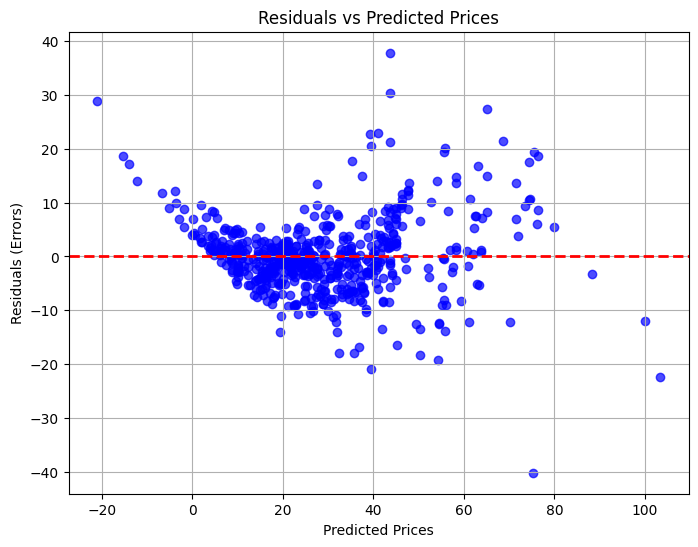

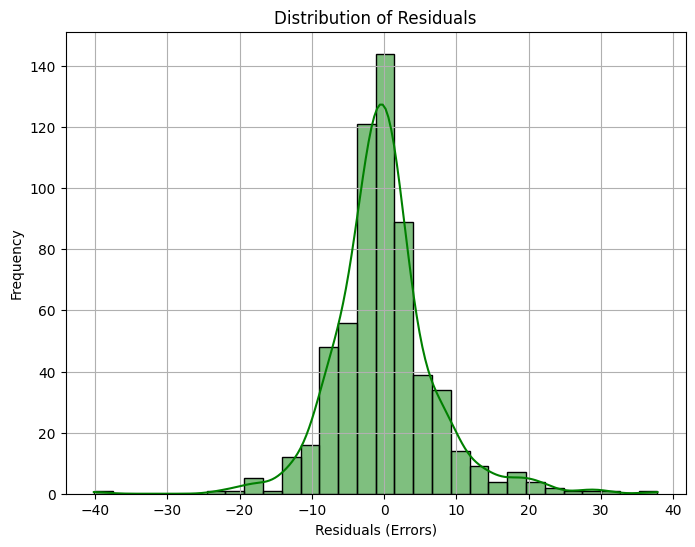

In [33]:


# Scatter plot: Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

# Residual Plot: Residuals (Errors) vs Predicted Prices
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color="blue")
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Errors)")
plt.title("Residuals vs Predicted Prices")
plt.grid(True)
plt.show()

# Histogram: Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='green')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



In [41]:
import gradio as gr

# Function to predict car price
def predict_car_price_with_name(car_name, model_year, mileage, engine_capacity, engine_type, transmission, assembly, body_type, show_logo):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        "car_name": [car_name],
        "model_year": [model_year],
        "mileage": [mileage],
        "engine_capacity": [engine_capacity],
        "engine_type": [engine_type],
        "transmission": [transmission],
        "assembly": [assembly],
        "body_type": [body_type],
    })

    # One-hot encode the input data to match the training format
    input_data = pd.get_dummies(input_data, columns=['engine_type', 'transmission', 'assembly', 'body_type'], drop_first=True)

    # Align the input data with the training data
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    # Make prediction
    predicted_price = model.predict(input_data)

    # Show the logo based on the checkbox value
    logo_path = "maju_logo.png" if show_logo else None
    return f"Predicted Car Price: PKR {predicted_price[0]:.2f} lacs", logo_path

# Define Gradio interface with car name, image, and checkbox
interface_with_name_and_logo = gr.Interface(
    fn=predict_car_price_with_name,
    inputs=[
        gr.Textbox(label="Car Name", placeholder="e.g., Toyota Corolla"),
        gr.Textbox(label="Model Year", placeholder="e.g., 2015"),
        gr.Textbox(label="Mileage (in km)", placeholder="e.g., 50000"),
        gr.Textbox(label="Engine Capacity (in cc)", placeholder="e.g., 1300"),
        gr.Dropdown(choices=["Petrol", "Diesel", "CNG"], label="Engine Type"),
        gr.Dropdown(choices=["Manual", "Automatic"], label="Transmission"),
        gr.Dropdown(choices=["Imported Cars", "Locally Assembled"], label="Assembly Type"),
        gr.Dropdown(choices=["Sedan", "Hatchback", "SUV", "Coupe", "Convertible"], label="Body Type"),
        gr.Checkbox(label="Show Logo Below Price")
    ],
    outputs=[
        gr.Textbox(label="Predicted Car Price"),
        gr.Image('maju_logo.png',label="MAJU", type="filepath")
    ],
    title="Car Price Prediction using Linear Regression \n MSCS Semester Project of Applied Programming",
    description="Enter the car name and details to predict the selling price in PKR lacs.",
)

# Launch the updated Gradio app
interface_with_name_and_logo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1e9ef53de11b049505.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
